In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from glob import glob

import tensorflow as tf

In [86]:
# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Data

In [3]:
data  = pd.read_pickle('../data/cleaned_df.pkl')
path = '../data/Flipkart/images/'
test_path = '../data/'

data_path = glob(path+'*/*.jp*')
data_test_path = glob(test_path+'*/*.jp*')

df = pd.DataFrame({
    "image_path": path+data['image'],
    "main_category": data['main_category'],
    "category_code": data['category_code']
}
)
df.head()


,image_path,main_category,category_code
0,../data/Flipkart/images/55b85ea15a1536d46b7190...,Home Furnishing,2
1,../data/Flipkart/images/7b72c92c2f6c40268628ec...,Baby Care,0
2,../data/Flipkart/images/64d5d4a258243731dc7bbb...,Baby Care,0
3,../data/Flipkart/images/d4684dcdc759dd9cdf4150...,Home Furnishing,2
4,../data/Flipkart/images/6325b6870c54cd47be6ebf...,Home Furnishing,2


In [4]:
df.groupby('category_code').count()

,image_path,main_category
category_code,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


# Implementation chek

## Pre-trained model

In [5]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [6]:
base_model = VGG16()
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output) # remove the last layers

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


## Create images features

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [8]:
images_features = []
i=0
for img_path in df['image_path']:
    if i%100 == 0: print(i)
    i+=1
    image = load_img(img_path, target_size=(224, 224)) # Load the image
    image = img_to_array(image) # Convert the image to numpy array
    image = np.expand_dims(image, axis=0) # Add one more dimension to the image so that it can be fed to the model (Batch size)
    image = preprocess_input(image) # Preprocess the image as per model's requirement
    # Predict from pre-trained model
    images_features.append(model.predict(image, verbose=0)[0]) # [0] to get rid of the extra dimension

images_features = np.asarray(images_features) # Convert the list to numpy array
images_features.shape

0
100
200
300
400
500
600


/Users/ikusawalaetitia/Desktop/laeti-dev/OC/Projets/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

## Dimensionality reduction and analysis

### PCA

In [9]:
from sklearn import decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99) # retain 99% of variance
feat_pca = pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### T-SNE

In [41]:
from sklearn import manifold
import time

start_time  = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
X_tsne = tsne.fit_transform(feat_pca)

duration = time.time() - start_time
print(f"t-SNE took {round(duration,2)} seconds")

/Users/ikusawalaetitia/Desktop/laeti-dev/OC/Projets/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE took 2.58 seconds


/var/folders/4f/ml64c07d1zsg_jvvydhyltjr0000gn/T/ipykernel_3346/2220948810.py:5: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


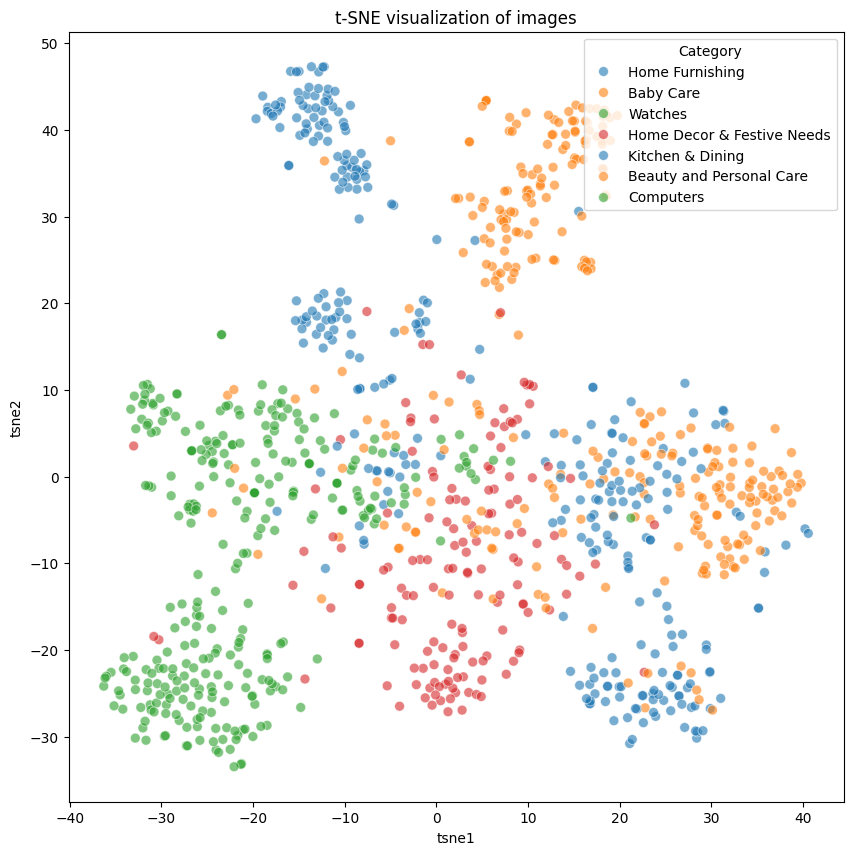

In [42]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['labels'] = df['main_category']

plt.figure(figsize=(10,10))
sns.scatterplot(
    x='tsne1',
    y='tsne2',
    hue='labels',
    palette=sns.color_palette('tab10', n_colors=4),
    s=50,
    alpha=0.6,
    data=df_tsne,
    legend="brief"
)

plt.title('t-SNE visualization of images')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(title='Category', loc='upper right')

plt.show()

It seems to be possible to separate automatically images according to their classes.

## Create clusters from T-SNE

In order to validate with ARI score what we can see visually, we are using the result of the t-sne to mesure the clusters

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [43]:
cls = KMeans(n_clusters=len(df['category_code'].unique()), random_state=42)
cls.fit(X_tsne)

KMeans(n_clusters=7, random_state=42)

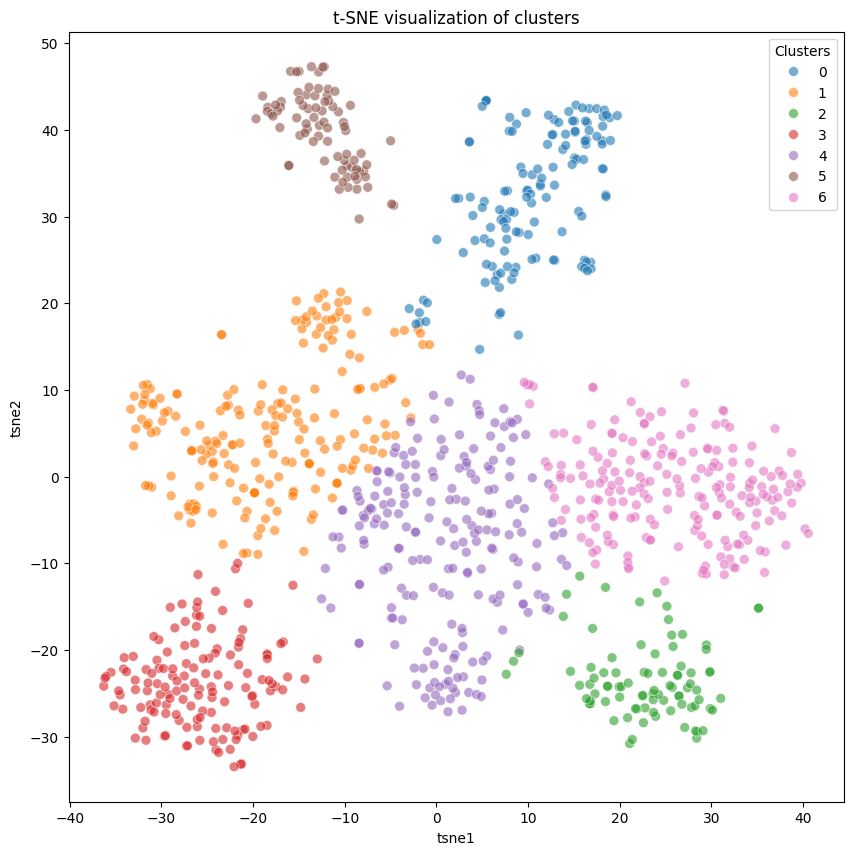

ARI score: 0.4864730292953567


In [44]:
df_tsne['cluster'] = cls.labels_

plt.figure(figsize=(10,10))
sns.scatterplot(
    x='tsne1',
    y='tsne2',
    hue='cluster',
    palette=sns.color_palette('tab10', n_colors=len(df['category_code'].unique())),
    s=50,
    alpha=0.6,
    data=df_tsne,
    legend="brief"
)

plt.title('t-SNE visualization of clusters')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.legend(title='Clusters', loc='upper right')

plt.show()

print(f'ARI score: {adjusted_rand_score(df_tsne["labels"], df_tsne["cluster"])}')

In [45]:
display(df_tsne.groupby('labels')['cluster'].value_counts().reset_index(name='count'))

# Associate the cluster with the majority class
cluster_majority_class = df_tsne.groupby('cluster')['labels'].agg(lambda x:x.value_counts().index[0]).to_dict()
print(cluster_majority_class)


,labels,cluster,count
0,Baby Care,6,111
1,Baby Care,4,20
2,Baby Care,2,8
3,Baby Care,1,6
4,Baby Care,0,4
5,Baby Care,5,1
6,Beauty and Personal Care,0,117
7,Beauty and Personal Care,4,16
8,Beauty and Personal Care,1,10
9,Beauty and Personal Care,6,4


{0: 'Beauty and Personal Care', 1: 'Computers', 2: 'Home Furnishing', 3: 'Watches', 4: 'Home Decor & Festive Needs', 5: 'Kitchen & Dining', 6: 'Baby Care'}


We can notice the strong confusion in the class "home furnishing" where almost as many images are categorized in class 6 and class 2

image_path       ../data/Flipkart/images/705b90361aeda1849a728d...
main_category                                            Baby Care
category_code                                                    0
Name: 651, dtype: object


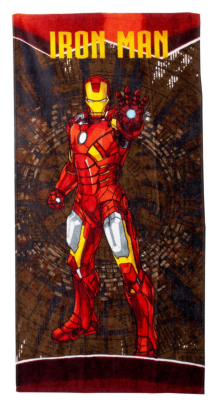

In [ ]:
# 'Baby Care' categorized in 'Home Decor & Festive Needs' cluster (4)
idx_list = [i for i in range(len(df['image_path'])) if (df.iloc[i]['main_category'] == 'Baby Care') and (df_tsne.iloc[i]['cluster'] == 4)]
chosen_image_idx = idx_list[4]
# Display the image
print(df.iloc[chosen_image_idx])
fig = plt.figure(figsize=(5,5))
filename = df['image_path'][chosen_image_idx]
img = plt.imread(filename)
plt.imshow(img)
plt.axis('off')
plt.show()

## Classes analysis

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
# Replace cluster number with majority class
df_tsne['cluster'] = df_tsne['cluster'].map(cluster_majority_class)
df_tsne

,tsne1,tsne2,labels,cluster
0,19.951475,-24.248835,Home Furnishing,Home Furnishing
1,19.296576,-4.431360,Baby Care,Baby Care
2,22.226871,-0.009062,Baby Care,Baby Care
3,25.834780,-19.600819,Home Furnishing,Home Furnishing
4,29.824327,-22.588203,Home Furnishing,Home Furnishing
...,...,...,...,...
1045,20.942812,-23.816582,Baby Care,Home Furnishing
1046,5.527549,-6.153522,Baby Care,Home Decor & Festive Needs
1047,17.047915,-17.523489,Baby Care,Home Furnishing
1048,6.476365,-6.370474,Baby Care,Home Decor & Festive Needs


In [47]:
# Check unique values in both columns
print("Unique values in df['main_category']:", df_tsne['labels'].unique())
print("Unique values in df_tsne['cluster']:", df_tsne['cluster'].unique())

# Ensure there are no NaN values
print("NaN values in df['main_category']:", df_tsne['labels'].isna().sum())
print("NaN values in df_tsne['cluster']:", df_tsne['cluster'].isna().sum())

Unique values in df['main_category']: ['Home Furnishing' 'Baby Care' 'Watches' 'Home Decor & Festive Needs'
 'Kitchen & Dining' 'Beauty and Personal Care' 'Computers']
Unique values in df_tsne['cluster']: ['Home Furnishing' 'Baby Care' 'Watches' 'Computers'
 'Home Decor & Festive Needs' 'Beauty and Personal Care'
 'Kitchen & Dining']
NaN values in df['main_category']: 0
NaN values in df_tsne['cluster']: 0


In [48]:
cm = confusion_matrix(df_tsne['labels'], df_tsne['cluster'])
cm

array([[111,   4,   6,  20,   8,   1,   0],
       [  4, 117,  10,  16,   2,   1,   0],
       [  1,   0, 119,  29,   0,   0,   1],
       [  9,   1,   9, 121,   6,   0,   4],
       [ 75,   0,   0,   4,  71,   0,   0],
       [  1,  10,  44,  17,   0,  78,   0],
       [  0,   0,  13,   2,   0,   0, 135]])

In [ ]:
# def transform_cm(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)

#     mapping = np.argmax(cm, axis=0) # Get the index of the max value in each column
#     print(f'Cluster to Category mapping: {mapping}')

#     labels = pd.Series(y_true, name='y_true').to_frame() # Convert to DataFrame
#     labels['y_pred'] = y_pred
#     labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: mapping[x]) # Transform the predicted labels

#     return labels['y_pred_transform']

In [49]:
# cluster_labels_transformed = transform_cm(df['category_code'], df_tsne['cluster'])
# cm = confusion_matrix(df['category_code'], cluster_labels_transformed)
# print(cm)
print(classification_report(df_tsne['labels'], df_tsne['cluster']))

                            precision    recall  f1-score   support

                 Baby Care       0.55      0.74      0.63       150
  Beauty and Personal Care       0.89      0.78      0.83       150
                 Computers       0.59      0.79      0.68       150
Home Decor & Festive Needs       0.58      0.81      0.67       150
           Home Furnishing       0.82      0.47      0.60       150
          Kitchen & Dining       0.97      0.52      0.68       150
                   Watches       0.96      0.90      0.93       150

                  accuracy                           0.72      1050
                 macro avg       0.77      0.72      0.72      1050
              weighted avg       0.77      0.72      0.72      1050



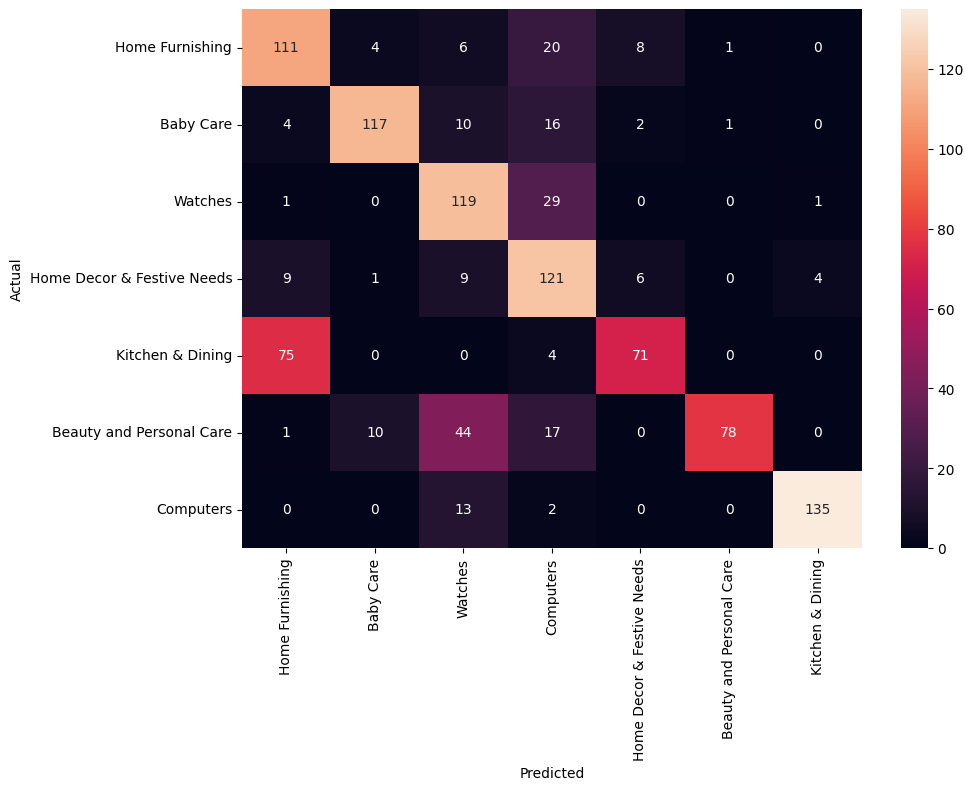

In [51]:
df_cm = pd.DataFrame(cm, index = [label for label in df_tsne['labels'].unique()], columns = [predicted_label for predicted_label in df_tsne['cluster'].unique()])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Supervised classification

## Data directory structure

In [60]:
import os
import shutil
import random

source_path = path
target_path = '../data/Flipkart/images_dataset/'
train_path = os.path.join(target_path, 'train')
test_path = os.path.join(target_path, 'test')

categories_labels = df['main_category'].unique()

# create directories for each category
for category in categories_labels:
    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)

# Counting the number of images in each category
train_cat_count = {category: 0 for category in categories_labels}
test_cat_count = {category: 0 for category in categories_labels}
train_img = []
test_img = []
# Splitting the images into train and test
for category in categories_labels:
    # get category images
    category_images = df[df['main_category'] == category]['image_path'].tolist()
    # shuffle the images
    random.shuffle(category_images)

    # 80% of images in train and 20% in test
    test_size = int(0.2 * len(category_images))

    # split the images
    train_images = category_images[test_size:]
    test_images = category_images[:test_size]

    # copy the images to the respective directories
    for img in train_images:
        shutil.copy(img, os.path.join(train_path, category))
        train_cat_count[category] += 1
        train_img.append(img)

    for img in test_images:
        shutil.copy(img, os.path.join(test_path, category))
        test_cat_count[category] += 1
        test_img.append(img)

# Show the number of images in each category
for category in categories_labels:
    print(f'{category}: Train: {train_cat_count[category]}, Test: {test_cat_count[category]}')

Home Furnishing: Train: 120, Test: 30
Baby Care: Train: 120, Test: 30
Watches: Train: 120, Test: 30
Home Decor & Festive Needs: Train: 120, Test: 30
Kitchen & Dining: Train: 120, Test: 30
Beauty and Personal Care: Train: 120, Test: 30
Computers: Train: 120, Test: 30


In [72]:
train_df = df.loc[df['image_path'].isin(train_img)]
test_df = df.loc[df['image_path'].isin(test_img)]
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_path     840 non-null    object
 1   main_category  840 non-null    object
 2   category_code  840 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 26.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 4 to 1045
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_path     210 non-null    object
 1   main_category  210 non-null    object
 2   category_code  210 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.6+ KB


(None, None)

In [152]:
# Create a dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Loss', 'Fit Time'])

## Prepare train and test sets

In [125]:
# Create a dataset from a directory
from tensorflow.keras.utils import image_dataset_from_directory

def create_dataset(path_to_directory: str, validation_split: int=0, label_mode:str='categorical', subset_type:str=None, shuffle=True) -> tf.data.Dataset:
    """Create a dataset from a directory

    Args:
        path_to_directory (str): Path to the directory containing the images
        validation_split (int, optional): Data to use as valisation set. Defaults to 0.
        data_type (str, optional): type of data to use. Defaults to None.
        shuffle (bool, optional): shuffling the data or not. Defaults to True.

    Returns:
        dataset (tuple): (images, labels)
    """
    return image_dataset_from_directory(
        path_to_directory,
        labels='inferred', # labels are generated from the directory structure
        label_mode=label_mode,
        batch_size=32,
        image_size=(224, 224),
        subset=subset_type,
        validation_split=validation_split, # Optional float between 0 and 1, fraction of data to reserve for validation.
        shuffle=shuffle,
        seed=42
    )

## Create model

In [135]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Rescaling, RandomFlip, RandomRotation, RandomZoom, Input
from tensorflow.keras.models import Model, Sequential

In [144]:
def create_model(loss_function='categorical_crossentropy', layers: list=None):
    input_shape = (224, 224, 3)
    inputs = Input(shape=input_shape)

    if layers :
        data_augmentation = Sequential(layers)
        x = data_augmentation(inputs)
    else:
        x = inputs

    # Load the pre-trained model
    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=x)

    # Freeze the layers to keep the trained model weights
    for layer in base_model.layers:
        layer.trainable = False

    # Get the output of the last layer
    x = base_model.output

    # Complete the model
    x = GlobalAveragePooling2D()(x) # Global Average Pooling layer
    x = Dense(256, activation='relu')(x) # Adds 256 neurons with ReLU activation function to the model
    x = Dropout(0.5)(x) # Dropout layer with 0.5 probability of dropout rate to prevent overfitting
    predictions = Dense(len(df['category_code'].unique()), activation='softmax')(x) # Output layer with softmax activation function for multi-class classification problem (7 classes)

    # Finalize the model
    model = Model(inputs=base_model.input, outputs=predictions)
    # Compile the model
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

    print(model.summary())

    return model


## Case 1 : preprocessing images without data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [77]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
def preprocess_image(images:pd.Series) -> np.array:
    """Preprocess the images and store them in a numpy array

    Args:
        images (pd.Series): list of image paths

    Returns:
        np.array: numpy array of preprocessed images
    """
    preprocessed_images = []
    for img_num in range(len(images)):
        image = load_img(
            images.iloc[img_num],
            target_size=(224, 224)
            ) # Load the image
        image = img_to_array(image) # Convert the image to numpy array
        image = image.reshape((image.shape[0], image.shape[1], image.shape[2])) # Reshape the image
        image = preprocess_input(image) # Preprocess the image as per model's requirement
        preprocessed_images.append(image)
    preprocessed_images = np.array(preprocessed_images) # Convert the list to numpy array

    return preprocessed_images

In [78]:
images_np = preprocess_image(train_df['image_path'])
print(images_np.shape)
images_np_test = preprocess_image(train_df['image_path'])
print(images_np_test.shape)

/Users/ikusawalaetitia/Desktop/laeti-dev/OC/Projets/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(840, 224, 224, 3)
(840, 224, 224, 3)


In [82]:
X = images_np
y_hot = to_categorical(train_df['category_code'])
y = train_df['category_code']

X_test = images_np_test
y_hot_test = to_categorical(train_df['category_code'])
y_test = train_df['category_code']

y_hot

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [89]:
X_train_hot, X_val_hot, y_train_hot, y_val_hot = train_test_split(X, y_hot, stratify=y_hot, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(630, 224, 224, 3)

In [ ]:
# Create a model
with tf.device('/GPU:0'):
    model1 = create_model()

model_save_path = '../data/models/model1.h5'
print(f"Model1 will be saved to {model_save_path}")
# Save the best model based on validation loss value during training process (ModelCheckpoint)
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Stop the training process if the model is not learning anymore (EarlyStopping)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks_list = [checkpoint, es]

start_time = time.time()
history = model1.fit(X_train_hot, y_train_hot, validation_data=(X_val_hot, y_val_hot), epochs=50, callbacks=callbacks_list)
duration = time.time() - start_time
print(f"Training took {round(duration,2)} seconds")

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None
Model1 will be saved to ../data/models/model1.h5
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2981 - loss: 8.2338
Epoch 1: val_loss improved from inf to 1.59785, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3039 - loss: 8.1163 - val_accuracy: 0.7000 - val_loss: 1.5978
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7091 - loss: 1.7790
Epoch 2: val_loss improved from 1.59785 to 1.26990, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7099 - loss: 1.7790 - val_accuracy: 0.7381 - val_loss: 1.2699
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7322 - loss: 1.3721
Epoch 3: val_loss improved from 1.26990 to 1.05477, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7333 - loss: 1.3640 - val_accuracy: 0.7762 - val_loss: 1.0548
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8091 - loss: 0.7163
Epoch 4: val_loss improved from 1.05477 to 0.77774, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8089 - loss: 0.7176 - val_accuracy: 0.8095 - val_loss: 0.7777
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8342 - loss: 0.7726
Epoch 5: val_loss improved from 0.77774 to 0.73558, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8345 - loss: 0.7685 - val_accuracy: 0.8048 - val_loss: 0.7356
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8782 - loss: 0.3804
Epoch 6: val_loss improved from 0.73558 to 0.66264, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8781 - loss: 0.3813 - val_accuracy: 0.8619 - val_loss: 0.6626
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8758 - loss: 0.3257
Epoch 7: val_loss improved from 0.66264 to 0.65522, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8765 - loss: 0.3255 - val_accuracy: 0.8619 - val_loss: 0.6552
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8938 - loss: 0.4137
Epoch 8: val_loss improved from 0.65522 to 0.61143, saving model to ../data/models/model1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8945 - loss: 0.4096 - val_accuracy: 0.8476 - val_loss: 0.6114
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9413 - loss: 0.1680
Epoch 9: val_loss did not improve from 0.61143
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9410 - loss: 0.1685 - val_accuracy: 0.8524 - val_loss: 0.6133
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9261 - loss: 0.1781
Epoch 10: val_loss did not improve from 0.61143
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9263 - loss: 0.1788 - val_accuracy: 0.8571 - val_loss: 0.6118
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9651 - loss: 0.1115
Epoch 11: val_loss did not improve from 0.61143
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9647 - loss: 0.1116 - val_accuracy: 0.8524 - val_loss: 0.6272
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9483 - loss: 0.1500
Epoch 12: val_loss did not improve from 0.61143
20/20 ━━━━━━━━

In [95]:
# Last epoch loss and accuracy
loss, accuracy = model1.evaluate(X_train_hot, y_train_hot, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')

loss, accuracy = model1.evaluate(X_val_hot, y_val_hot, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9992 - loss: 0.0148
Loss: 0.015310907736420631, Accuracy: 0.9984126687049866
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8893 - loss: 0.4072
Loss: 0.6230289936065674, Accuracy: 0.8619047403335571


In [ ]:
# Best model loss and accuracy
model1.load_weights(model_save_path) # Load the best model

loss, accuracy = model1.evaluate(X_val_hot, y_val_hot, verbose=0)
print(f'Test Accuracy: {accuracy}')


loss, accuracy_test = model1.evaluate(X_test, y_hot_test, verbose=0)
print(f'Validation Accuracy: {accuracy}')

Test Accuracy: 0.8476190567016602
Validation Accuracy: 0.9571428298950195


In [ ]:
# Save results
new_results = pd.DataFrame(
    {
        'Model': ['VGG16_simple'],
        'Test Accuracy': [accuracy_test],
        'Loss': [loss],
        'Fit time': [duration]
    }
)

new_results

,Model,Test Accuracy,Loss,Fit time
0,Model1,0.833333,0.580603,1012.210241


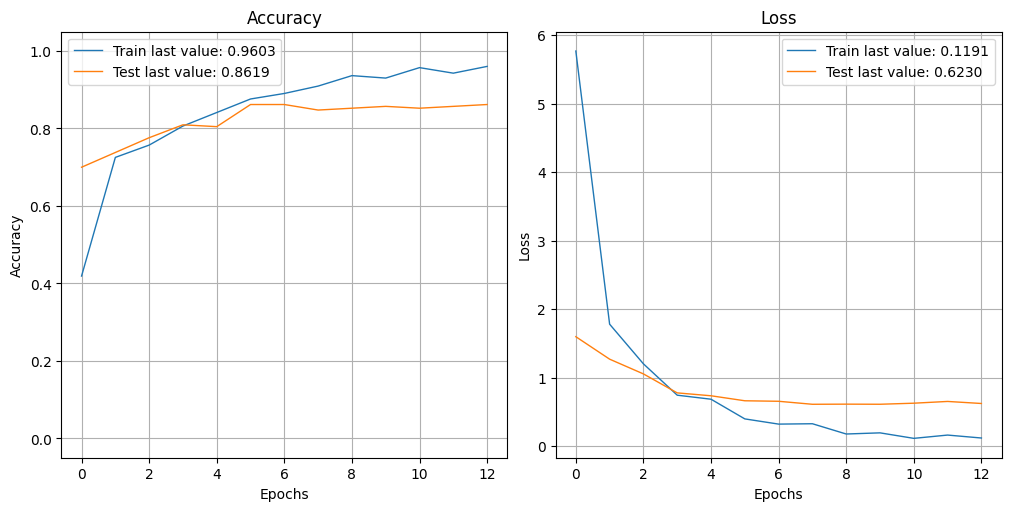

In [97]:
from plot_keras_history import plot_history, show_history

show_history(history)
plot_history(history, path="../data/models/model1_history.png")
plt.close()

In [98]:
y_test_num = np.argmax(y_val_hot, axis=1)
y_test_pred = np.argmax(model1.predict(X_val_hot), axis=1)
y_test_num = np.argmax(y_val_hot, axis=1)

print(y_test_num)
print(y_test_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
[0 2 6 2 4 1 1 0 2 4 2 6 1 6 5 2 1 1 4 3 4 2 6 6 3 3 0 1 2 4 6 3 4 2 6 5 2
 5 6 3 0 2 6 5 2 0 1 6 4 6 5 3 3 3 5 3 5 4 4 0 4 0 6 6 2 5 0 0 1 3 5 3 5 1
 4 6 2 4 5 1 4 0 5 4 1 5 2 2 3 1 3 5 4 3 5 4 6 0 2 0 3 4 5 1 3 3 6 1 1 4 3
 0 3 2 5 2 1 6 1 4 5 5 3 0 0 3 2 6 3 6 5 1 2 6 6 1 1 5 3 4 3 3 5 1 0 4 5 0
 5 4 0 6 0 0 4 0 2 4 1 2 4 0 5 2 4 1 5 2 4 1 0 2 1 6 4 2 4 3 0 0 6 2 0 4 6
 5 0 2 3 1 6 0 6 1 5 0 5 0 2 3 1 6 1 2 1 3 6 3 6 5]
[0 2 6 0 4 6 1 0 2 4 2 6 1 6 5 2 1 1 4 3 4 2 6 6 3 3 0 0 2 4 6 3 4 2 6 5 2
 5 6 3 0 2 6 5 2 0 1 6 4 6 5 3 3 3 5 3 5 4 5 0 4 0 1 1 2 5 0 0 1 3 5 3 5 1
 4 6 2 4 5 5 4 0 4 4 1 5 2 2 3 1 3 5 4 3 5 4 6 0 2 4 3 4 5 2 3 3 6 1 1 4 3
 0 3 2 4 2 1 6 4 4 5 5 3 0 0 3 2 6 5 6 5 3 2 6 0 1 1 5 3 4 3 3 0 1 0 5 5 1
 5 4 0 6 0 2 4 0 2 4 1 0 4 0 5 2 4 1 5 2 4 1 0 2 6 5 4 2 4 3 0 0 6 2 0 4 6
 5 2 2 0 1 0 2 6 1 5 1 1 0 2 3 1 6 3 2 6 1 6 3 6 1]


In [134]:
cm = confusion_matrix(y_test_num, y_test_pred)
print(cm)

[[12  1  2  0  0  0  0]
 [ 1 10  1  2  1  0  0]
 [ 0  0 14  1  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 1  0  0  0 13  1  0]
 [ 0  1  2  0  1 10  1]
 [ 0  0  2  0  0  2 11]]


In [99]:
def transform_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    mapping = np.argmax(cm, axis=0) # Get the index of the max value in each column
    print(f'Cluster to Category mapping: {mapping}')

    labels = pd.Series(y_true, name='y_true').to_frame() # Convert to DataFrame
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: mapping[x]) # Transform the predicted labels

    return labels['y_pred_transform']

In [104]:
y_test_pred_transformed = transform_cm(y_test_num, y_test_pred)
# map to original category
y_test_pred_transformed = y_test_pred_transformed.map(cluster_majority_class)
y_test_labelled = pd.Series(y_test_num).map(cluster_majority_class)

cm = confusion_matrix(y_test_labelled, y_test_pred_transformed)
print(cm)

print(classification_report(y_test_labelled, y_test_pred_transformed))

Cluster to Category mapping: [0 1 2 3 4 5 6]
[[25  2  2  0  0  1  0]
 [ 0 24  2  1  3  0  0]
 [ 3  1 21  1  1  1  2]
 [ 0  0  0 28  0  2  0]
 [ 0  2  0  0 28  0  0]
 [ 0  1  2  2  0 25  0]
 [ 0  1  1  0  0  1 27]]
                            precision    recall  f1-score   support

                 Baby Care       0.89      0.83      0.86        30
  Beauty and Personal Care       0.77      0.80      0.79        30
                 Computers       0.75      0.70      0.72        30
Home Decor & Festive Needs       0.88      0.93      0.90        30
           Home Furnishing       0.88      0.93      0.90        30
          Kitchen & Dining       0.83      0.83      0.83        30
                   Watches       0.93      0.90      0.92        30

                  accuracy                           0.85       210
                 macro avg       0.85      0.85      0.85       210
              weighted avg       0.85      0.85      0.85       210



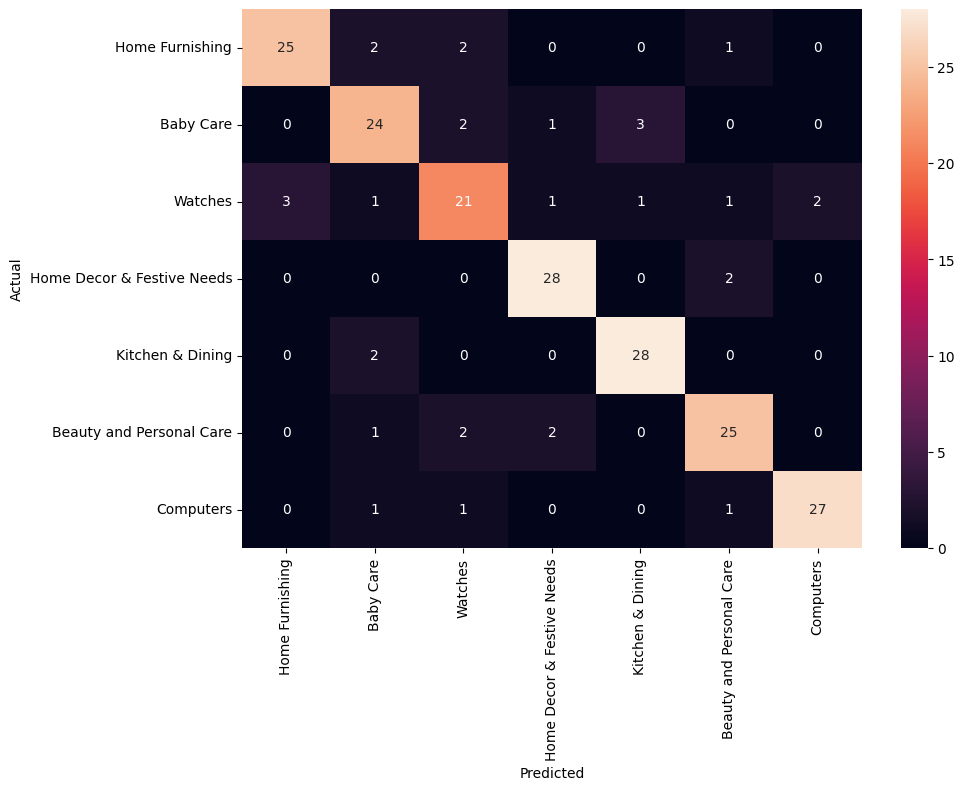

In [105]:
df_cm = pd.DataFrame(cm, index = [label for label in df['main_category'].unique()], columns = [pred_label for pred_label in df['main_category'].unique()])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Case 2: Data augmentation

CF https://www.tensorflow.org/tutorials/images/data_augmentation

### Prepare data

In [126]:
train_set = create_dataset(train_path, validation_split=0.2, subset_type='training')
val_set = create_dataset(train_path, validation_split=0.2, subset_type='validation')
test_set = create_dataset(test_path)

Found 840 files belonging to 7 classes.
Using 672 files for training.
Found 840 files belonging to 7 classes.
Using 168 files for validation.
Found 210 files belonging to 7 classes.


In [145]:
data_agmentation_layers = [
    RandomFlip('horizontal', input_shape=(224, 224, 3)), # Randomly flip the image horizontally
    RandomRotation(0.1), # Randomly rotate the image by 0.1
    RandomZoom(0.1), # Randomly zoom the image by 0.1
    Rescaling(1./127.5, offset=-1.0) # Rescale the image
]
with tf.device('/GPU:0'):
    model2 = create_model(layers=data_agmentation_layers)

# Create callback
model_save_path = '../data/models/model2.h5'
print(f"Model2 will be saved to {model_save_path}")
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


/Users/ikusawalaetitia/Desktop/laeti-dev/OC/Projets/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None
Model2 will be saved to ../data/models/model2.h5


In [146]:
start_time = time.time()
history = model2.fit(train_set, validation_data=val_set, epochs=50, callbacks=callbacks_list)
duration = time.time() - start_time
print(f"Training took {round(duration,2)} seconds")

Epoch 1/50


/Users/ikusawalaetitia/Desktop/laeti-dev/OC/Projets/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_330']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1978 - loss: 1.9995
Epoch 1: val_loss improved from inf to 1.48120, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2007 - loss: 1.9939 - val_accuracy: 0.5476 - val_loss: 1.4812
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4788 - loss: 1.4788
Epoch 2: val_loss improved from 1.48120 to 1.14510, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4800 - loss: 1.4763 - val_accuracy: 0.6607 - val_loss: 1.1451
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5943 - loss: 1.1875
Epoch 3: val_loss improved from 1.14510 to 0.95853, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5953 - loss: 1.1866 - val_accuracy: 0.7262 - val_loss: 0.9585
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6564 - loss: 1.0619
Epoch 4: val_loss improved from 0.95853 to 0.91374, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6575 - loss: 1.0607 - val_accuracy: 0.6964 - val_loss: 0.9137
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6899 - loss: 0.9423
Epoch 5: val_loss improved from 0.91374 to 0.82274, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6903 - loss: 0.9419 - val_accuracy: 0.7381 - val_loss: 0.8227
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7404 - loss: 0.8628
Epoch 6: val_loss improved from 0.82274 to 0.77327, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7404 - loss: 0.8615 - val_accuracy: 0.7381 - val_loss: 0.7733
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7074 - loss: 0.8426
Epoch 7: val_loss improved from 0.77327 to 0.75638, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7078 - loss: 0.8413 - val_accuracy: 0.7619 - val_loss: 0.7564
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7253 - loss: 0.8159
Epoch 8: val_loss improved from 0.75638 to 0.73519, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7258 - loss: 0.8153 - val_accuracy: 0.7440 - val_loss: 0.7352
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7390 - loss: 0.7895
Epoch 9: val_loss did not improve from 0.73519
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7390 - loss: 0.7893 - val_accuracy: 0.7440 - val_loss: 0.7511
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7550 - loss: 0.7104
Epoch 10: val_loss improved from 0.73519 to 0.72183, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7547 - loss: 0.7116 - val_accuracy: 0.7619 - val_loss: 0.7218
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7704 - loss: 0.6651
Epoch 11: val_loss improved from 0.72183 to 0.68939, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7699 - loss: 0.6665 - val_accuracy: 0.7857 - val_loss: 0.6894
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7930 - loss: 0.6411
Epoch 12: val_loss did not improve from 0.68939
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7918 - loss: 0.6427 - val_accuracy: 0.7738 - val_loss: 0.6961
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7604 - loss: 0.6709
Epoch 13: val_loss did not improve from 0.68939
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7615 - loss: 0.6707 - val_accuracy: 0.7500 - val_loss: 0.7166
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7848 - loss: 0.6366
Epoch 14: val_loss improved from 0.68939 to 0.68874, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7848 - loss: 0.6361 - val_accuracy: 0.7679 - val_loss: 0.6887
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7731 - loss: 0.6503
Epoch 15: val_loss improved from 0.68874 to 0.67268, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7742 - loss: 0.6495 - val_accuracy: 0.7679 - val_loss: 0.6727
Epoch 16/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8207 - loss: 0.5861
Epoch 16: val_loss improved from 0.67268 to 0.65122, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8205 - loss: 0.5862 - val_accuracy: 0.7917 - val_loss: 0.6512
Epoch 17/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8211 - loss: 0.5501
Epoch 17: val_loss did not improve from 0.65122
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8203 - loss: 0.5516 - val_accuracy: 0.7738 - val_loss: 0.6743
Epoch 18/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8437 - loss: 0.5115
Epoch 18: val_loss did not improve from 0.65122
21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8430 - loss: 0.5127 - val_accuracy: 0.7857 - val_loss: 0.6577
Epoch 19/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8454 - loss: 0.5091
Epoch 19: val_loss did not improve from 0.65122
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8442 - loss: 0.5106 - val_accuracy: 0.7857 - val_loss: 0.6557
Epoch 20/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8390 - loss: 0.5321
Epoch 20: val_loss improved from 0.65122 to 0.63814, saving 

21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8388 - loss: 0.5318 - val_accuracy: 0.8036 - val_loss: 0.6381
Epoch 21/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8254 - loss: 0.5166
Epoch 21: val_loss did not improve from 0.63814
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8255 - loss: 0.5173 - val_accuracy: 0.7857 - val_loss: 0.6733
Epoch 22/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8037 - loss: 0.5913
Epoch 22: val_loss improved from 0.63814 to 0.63076, saving model to ../data/models/model2.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8046 - loss: 0.5881 - val_accuracy: 0.7976 - val_loss: 0.6308
Epoch 23/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8440 - loss: 0.5149
Epoch 23: val_loss did not improve from 0.63076
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8437 - loss: 0.5149 - val_accuracy: 0.8095 - val_loss: 0.6432
Epoch 24/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8327 - loss: 0.4791
Epoch 24: val_loss did not improve from 0.63076
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8334 - loss: 0.4790 - val_accuracy: 0.8036 - val_loss: 0.6400
Epoch 25/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8374 - loss: 0.5589
Epoch 25: val_loss did not improve from 0.63076
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8380 - loss: 0.5560 - val_accuracy: 0.8155 - val_loss: 0.6366
Epoch 26/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8645 - loss: 0.4666
Epoch 26: val_loss did not improve from 0.63076
21/21 ━━━━━━

In [147]:
loss, accuracy = model2.evaluate(train_set, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')

loss, accuracy = model2.evaluate(val_set, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8908 - loss: 0.3323
Loss: 0.3297175168991089, Accuracy: 0.8883928656578064
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8115 - loss: 0.6239
Loss: 0.6562210917472839, Accuracy: 0.8035714030265808


In [148]:
model2.load_weights(model_save_path) # Load the best model

loss, accuracy = model2.evaluate(val_set, verbose=0)
print(f'Test Accuracy: {accuracy}')

loss, accuracy = model2.evaluate(test_set, verbose=0)
print(f'Validation Accuracy: {accuracy}')

Test Accuracy: 0.7976190447807312
Validation Accuracy: 0.8333333134651184


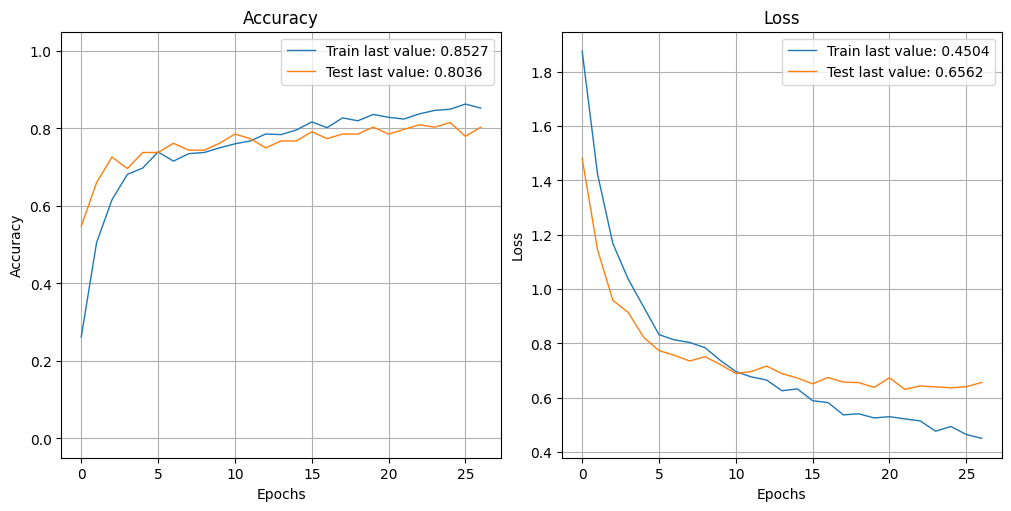

In [149]:
show_history(history)
plot_history(history, path="data/models/model2_history.png")
plt.close()